In [229]:
from scipy.stats import lognorm

<ipython-input-230-401d35eb19a4>:19: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(scaled_fitted_dist))


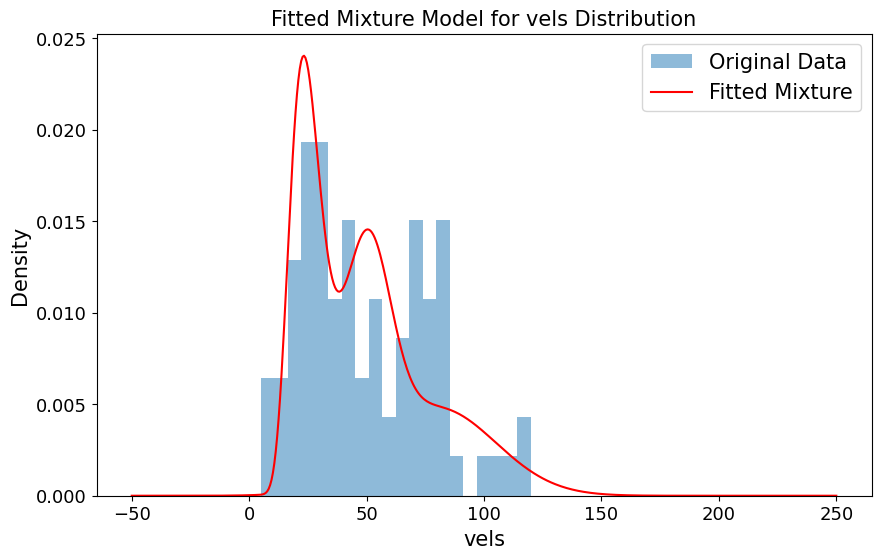

Scaling Factor: 1.000
Fractional Importance of Chi-Squared Distribution: 0.400
Fractional Importance of Gaussian Distribution with Fixed Peak: 0.300
Fractional Importance of Gaussian Distribution with Varying Peak: 0.300


In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import chi2, norm
from sklearn.utils import check_random_state

# Define the log-likelihood function for the mixture model
def log_likelihood(params, x):
    scaling_factor, frac_chisq, frac_gaussian_fixed_peak, std_gaussian_fixed_peak, frac_gaussian_vary_peak, peak_gaussian_vary_peak, frac_gaussian_fixed_std = params

    chisq_pdf = frac_chisq * chi2.pdf(x, df=25, loc=0, scale=1)
    gaussian_fixed_peak_pdf = frac_gaussian_fixed_peak * norm.pdf(x, loc=50, scale=std_gaussian_fixed_peak)
    gaussian_vary_peak_pdf = frac_gaussian_vary_peak * norm.pdf(x, loc=peak_gaussian_vary_peak, scale=25)

    scaled_fitted_dist = scaling_factor * (chisq_pdf + gaussian_fixed_peak_pdf + gaussian_vary_peak_pdf)
    scaled_fitted_dist /= np.trapz(scaled_fitted_dist, x=x)

    return -np.sum(np.log(scaled_fitted_dist))

# Load the CSV data
df = pd.read_csv('/content/space_vels')

# Extract vels column
vels_data = abs(np.array(df['vels']))

# Initial parameter values for optimization
initial_params = [1, 0.4, 0.3, 10, 0.3, 80, 0.3]

# Define parameter bounds
param_bounds = [(0.1, 10), (0, 1), (0, 1), (0, 25), (0, 1), (60, 100), (0, 1)]

# Perform the optimization
result = minimize(log_likelihood, initial_params, args=(vels_data,), method='L-BFGS-B', bounds=param_bounds)
fitted_params = result.x

# Extract the fitted parameters
scaling_factor, frac_chisq, frac_gaussian_fixed_peak, std_gaussian_fixed_peak, frac_gaussian_vary_peak, peak_gaussian_vary_peak, frac_gaussian_fixed_std = fitted_params

# Plot the original vels distribution and the fitted distributions
x_vals = np.linspace(-50, 250, 500)
fitted_dist = (
    scaling_factor * (
        frac_chisq * chi2.pdf(x_vals, df=25, loc=0, scale=1) +
        frac_gaussian_fixed_peak * norm.pdf(x_vals, loc=50, scale=std_gaussian_fixed_peak) +
        frac_gaussian_vary_peak * norm.pdf(x_vals, loc=peak_gaussian_vary_peak, scale=25)
    )
)

plt.figure(figsize=(10, 6))
plt.hist(vels_data, bins=20, density=True, alpha=0.5, label='Original Data')
plt.plot(x_vals, fitted_dist, 'r-', label='Fitted Mixture')
plt.title('Fitted Mixture Model for vels Distribution')
plt.xlabel('vels')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the fractional importance of the distributions
print(f"Scaling Factor: {scaling_factor:.3f}")
print(f"Fractional Importance of Chi-Squared Distribution: {frac_chisq:.3f}")
print(f"Fractional Importance of Gaussian Distribution with Fixed Peak: {frac_gaussian_fixed_peak:.3f}")
print(f"Fractional Importance of Gaussian Distribution with Varying Peak: {frac_gaussian_vary_peak:.3f}")

<ipython-input-231-a075cec13f1d>:19: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(scaled_fitted_dist))


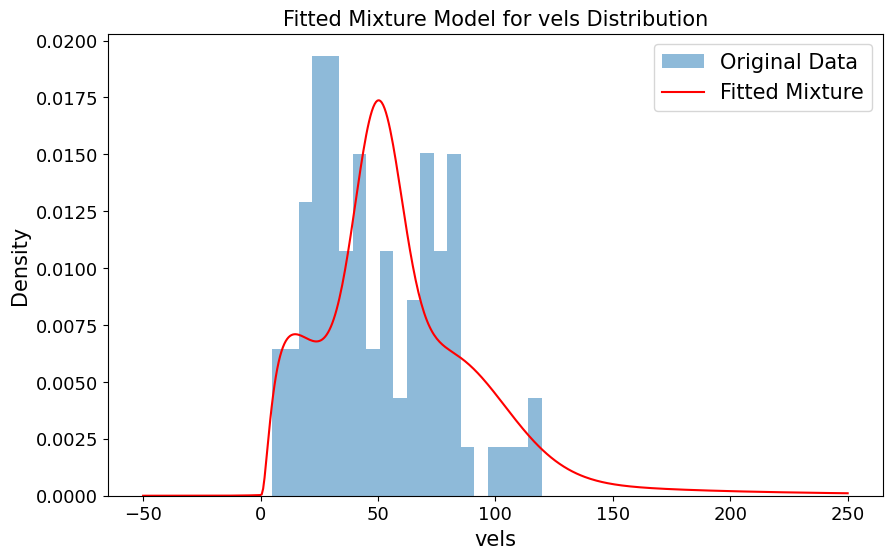

Scaling Factor: 1.000
Fractional Importance of Log-Normal Distribution: 0.400
Standard Deviation of Log-Normal Distribution: 1.000
Fractional Importance of Gaussian Distribution with Fixed Peak: 0.300
Fractional Importance of Gaussian Distribution with Varying Peak: 0.300


In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import lognorm, norm
from sklearn.utils import check_random_state

# Define the log-likelihood function for the mixture model
def log_likelihood(params, x):
    scaling_factor, frac_lognorm, std_lognorm, frac_gaussian_fixed_peak, std_gaussian_fixed_peak, frac_gaussian_vary_peak, peak_gaussian_vary_peak, frac_gaussian_fixed_std = params

    lognorm_pdf = frac_lognorm * lognorm.pdf(x, s=std_lognorm, loc=0, scale=38)
    gaussian_fixed_peak_pdf = frac_gaussian_fixed_peak * norm.pdf(x, loc=50, scale=std_gaussian_fixed_peak)
    gaussian_vary_peak_pdf = frac_gaussian_vary_peak * norm.pdf(x, loc=peak_gaussian_vary_peak, scale=25)

    scaled_fitted_dist = scaling_factor * (lognorm_pdf + gaussian_fixed_peak_pdf + gaussian_vary_peak_pdf)
    scaled_fitted_dist /= np.trapz(scaled_fitted_dist, x=x)

    return -np.sum(np.log(scaled_fitted_dist))

# Load the CSV data
df = pd.read_csv('/content/space_vels')

# Extract vels column
vels_data = abs(np.array(df['vels']))

# Initial parameter values for optimization
initial_params = [1, 0.4, 1, 0.3, 10, 0.3, 80, 0.3]

# Define parameter bounds
param_bounds = [(0.1, 10), (0, 1), (0.1, 2), (0, 1), (0, 25), (0, 1), (60, 100), (0, 1)]

# Perform the optimization
result = minimize(log_likelihood, initial_params, args=(vels_data,), method='L-BFGS-B', bounds=param_bounds)
fitted_params = result.x

# Extract the fitted parameters
scaling_factor, frac_lognorm, std_lognorm, frac_gaussian_fixed_peak, std_gaussian_fixed_peak, frac_gaussian_vary_peak, peak_gaussian_vary_peak, frac_gaussian_fixed_std = fitted_params

# Plot the original vels distribution and the fitted distributions
x_vals = np.linspace(-50, 250, 500)
fitted_dist = (
    scaling_factor * (
        frac_lognorm * lognorm.pdf(x_vals, s=std_lognorm, loc=0, scale=38) +
        frac_gaussian_fixed_peak * norm.pdf(x_vals, loc=50, scale=std_gaussian_fixed_peak) +
        frac_gaussian_vary_peak * norm.pdf(x_vals, loc=peak_gaussian_vary_peak, scale=25)
    )
)

plt.figure(figsize=(10, 6))
plt.hist(vels_data, bins=20, density=True, alpha=0.5, label='Original Data')
plt.plot(x_vals, fitted_dist, 'r-', label='Fitted Mixture')
plt.title('Fitted Mixture Model for vels Distribution')
plt.xlabel('vels')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the fractional importance of the distributions
print(f"Scaling Factor: {scaling_factor:.3f}")
print(f"Fractional Importance of Log-Normal Distribution: {frac_lognorm:.3f}")
print(f"Standard Deviation of Log-Normal Distribution: {std_lognorm:.3f}")
print(f"Fractional Importance of Gaussian Distribution with Fixed Peak: {frac_gaussian_fixed_peak:.3f}")
print(f"Fractional Importance of Gaussian Distribution with Varying Peak: {frac_gaussian_vary_peak:.3f}")

<ipython-input-232-0c5f2d0e0d7a>:11: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(scaled_fitted_dist))


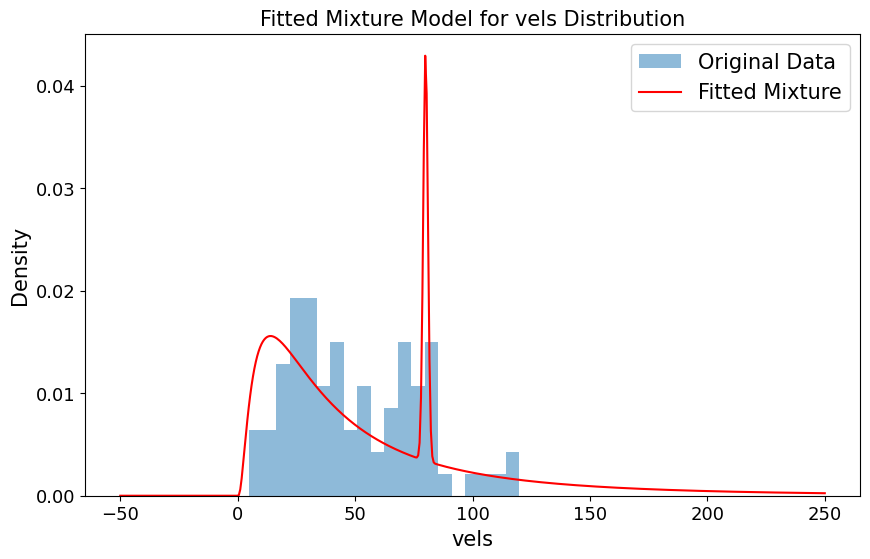

Scaling Factor: 1.000
Fractional Importance of Log-Normal Distribution: 0.900
Standard Deviation of Log-Normal Distribution: 1.000
Peak of Gaussian Distribution: 80.000
Standard Deviation of Gaussian Distribution: 1.000


In [232]:
# Define the log-likelihood function for the mixture model
def log_likelihood(params, x):
    scaling_factor, frac_lognorm, std_lognorm, peak_gaussian, std_peak_gaussian = params

    lognorm_pdf = frac_lognorm * lognorm.pdf(x, s=std_lognorm, loc=0, scale=38)
    gaussian_peak_pdf = (1 - frac_lognorm) * norm.pdf(x, loc=peak_gaussian, scale=std_peak_gaussian)

    scaled_fitted_dist = scaling_factor * (lognorm_pdf + gaussian_peak_pdf)
    scaled_fitted_dist /= np.trapz(scaled_fitted_dist, x=x)

    return -np.sum(np.log(scaled_fitted_dist))

# Load the CSV data
df = pd.read_csv('/content/space_vels')

# Extract vels column
vels_data = abs(np.array(df['vels']))

# Initial parameter values for optimization
initial_params = [1, 0.9, 1, 80, 1]

# Define parameter bounds
param_bounds = [(0.1, 10), (0, 1), (0.1, 2), (60, 100), (0.01, 10)]

# Perform the optimization
result = minimize(log_likelihood, initial_params, args=(vels_data,), method='L-BFGS-B', bounds=param_bounds)
fitted_params = result.x

# Extract the fitted parameters
scaling_factor, frac_lognorm, std_lognorm, peak_gaussian, std_peak_gaussian = fitted_params

# Plot the original vels distribution and the fitted distribution
x_vals = np.linspace(-50, 250, 500)
fitted_dist = (
    scaling_factor * (
        frac_lognorm * lognorm.pdf(x_vals, s=std_lognorm, loc=0, scale=38) +
        (1 - frac_lognorm) * norm.pdf(x_vals, loc=peak_gaussian, scale=std_peak_gaussian)
    )
)

plt.figure(figsize=(10, 6))
plt.hist(vels_data, bins=20, density=True, alpha=0.5, label='Original Data')
plt.plot(x_vals, fitted_dist, 'r-', label='Fitted Mixture')
plt.title('Fitted Mixture Model for vels Distribution')
plt.xlabel('vels')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the fitted parameters
print(f"Scaling Factor: {scaling_factor:.3f}")
print(f"Fractional Importance of Log-Normal Distribution: {frac_lognorm:.3f}")
print(f"Standard Deviation of Log-Normal Distribution: {std_lognorm:.3f}")
print(f"Peak of Gaussian Distribution: {peak_gaussian:.3f}")
print(f"Standard Deviation of Gaussian Distribution: {std_peak_gaussian:.3f}")

<ipython-input-233-43a27e6e9bd5>:11: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(scaled_fitted_dist))


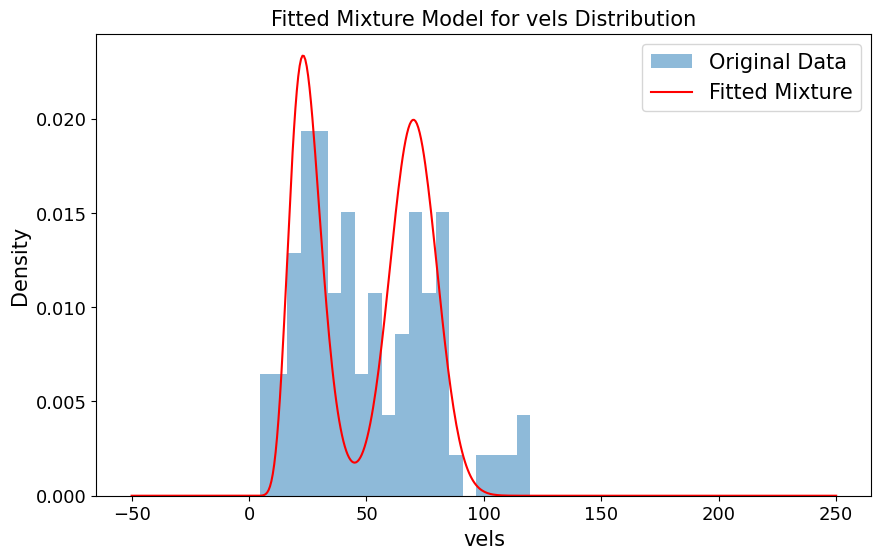

Scaling Factor: 1.000
Fractional Importance of Chi-Squared Distribution: 0.400
Fractional Importance of Gaussian Distribution: 0.500
Peak of Gaussian Distribution: 70.000
Standard Deviation of Gaussian Distribution: 10.000


In [233]:
# Define the log-likelihood function for the mixture model
def log_likelihood(params, x):
    scaling_factor, frac_chisq, frac_gaussian, peak_gaussian, std_peak_gaussian = params

    chisq_pdf = frac_chisq * chi2.pdf(x, df=25, loc=0, scale=1)
    gaussian_pdf = frac_gaussian * norm.pdf(x, loc=peak_gaussian, scale=std_peak_gaussian)

    scaled_fitted_dist = scaling_factor * (chisq_pdf + gaussian_pdf)
    scaled_fitted_dist /= np.trapz(scaled_fitted_dist, x=x)

    return -np.sum(np.log(scaled_fitted_dist))

# Load the CSV data
df = pd.read_csv('/content/space_vels')

# Extract vels column
vels_data = abs(np.array(df['vels']))

# Initial parameter values for optimization
initial_params = [1, 0.4, 0.5, 70, 10]

# Define parameter bounds
param_bounds = [(0.1, 10), (0, 1), (0, 1), (50, 90), (0.01, 10)]

# Perform the optimization
result = minimize(log_likelihood, initial_params, args=(vels_data,), method='L-BFGS-B', bounds=param_bounds)
fitted_params = result.x

# Extract the fitted parameters
scaling_factor, frac_chisq, frac_gaussian, peak_gaussian, std_peak_gaussian = fitted_params

# Plot the original vels distribution and the fitted distribution
x_vals = np.linspace(-50, 250, 500)
fitted_dist = (
    scaling_factor * (
        frac_chisq * chi2.pdf(x_vals, df=25, loc=0, scale=1) +
        frac_gaussian * norm.pdf(x_vals, loc=peak_gaussian, scale=std_peak_gaussian)
    )
)

plt.figure(figsize=(10, 6))
plt.hist(vels_data, bins=20, density=True, alpha=0.5, label='Original Data')
plt.plot(x_vals, fitted_dist, 'r-', label='Fitted Mixture')
plt.title('Fitted Mixture Model for vels Distribution')
plt.xlabel('vels')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the fitted parameters
print(f"Scaling Factor: {scaling_factor:.3f}")
print(f"Fractional Importance of Chi-Squared Distribution: {frac_chisq:.3f}")
print(f"Fractional Importance of Gaussian Distribution: {frac_gaussian:.3f}")
print(f"Peak of Gaussian Distribution: {peak_gaussian:.3f}")
print(f"Standard Deviation of Gaussian Distribution: {std_peak_gaussian:.3f}")

<ipython-input-234-edb81cd6eec1>:11: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(scaled_fitted_dist))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


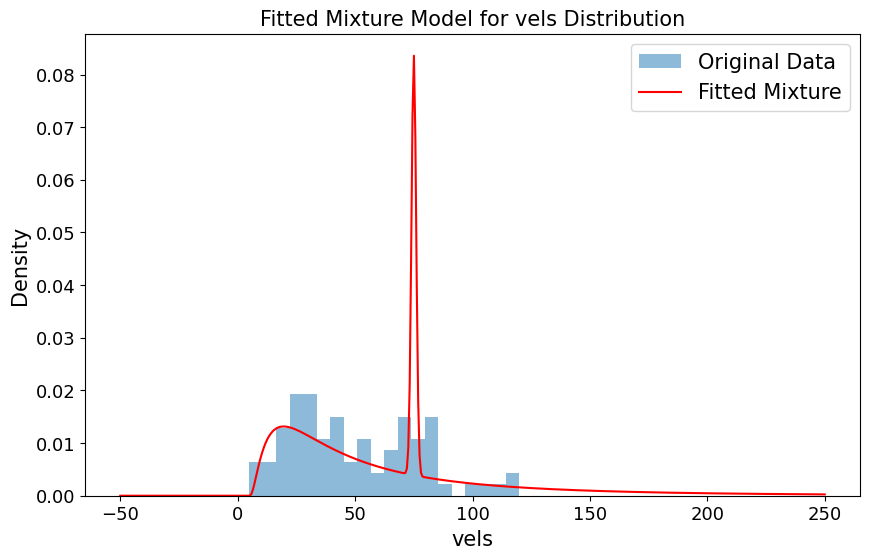

Scaling Factor: 1.000
Fractional Importance of Log-Normal Distribution: 0.800
Standard Deviation of Log-Normal Distribution: 1.000
Peak of Gaussian Distribution: 75.000
Standard Deviation of Gaussian Distribution: 1.000


In [234]:
# Define the log-likelihood function for the mixture model
def log_likelihood(params, x):
    scaling_factor, frac_lognorm, std_lognorm, peak_gaussian, std_peak_gaussian = params

    lognorm_pdf = frac_lognorm * lognorm.pdf(x, s=std_lognorm, loc=min(x), scale=40)
    gaussian_pdf = (1 - frac_lognorm) * norm.pdf(x, loc=peak_gaussian, scale=std_peak_gaussian)

    scaled_fitted_dist = scaling_factor * (lognorm_pdf + gaussian_pdf)
    scaled_fitted_dist /= np.trapz(scaled_fitted_dist, x=x)

    return -np.sum(np.log(scaled_fitted_dist))

# Load the CSV data
df = pd.read_csv('/content/space_vels')

# Extract vels column
vels_data = abs(np.array(df['vels']))

# Initial parameter values for optimization
initial_params = [1, 0.8, 1, 75, 1]

# Define parameter bounds
param_bounds = [(0.1, 10), (0, 1), (0.1, 2), (60, 90), (0.01, 10)]

# Perform the optimization
result = minimize(log_likelihood, initial_params, args=(vels_data,), method='L-BFGS-B', bounds=param_bounds)
fitted_params = result.x

# Extract the fitted parameters
scaling_factor, frac_lognorm, std_lognorm, peak_gaussian, std_peak_gaussian = fitted_params

# Plot the original vels distribution and the fitted distribution
x_vals = np.linspace(-50, 250, 500)
fitted_dist = (
    scaling_factor * (
        frac_lognorm * lognorm.pdf(x_vals, s=std_lognorm, loc=min(vels_data), scale=40) +
        (1 - frac_lognorm) * norm.pdf(x_vals, loc=peak_gaussian, scale=std_peak_gaussian)
    )
)

plt.figure(figsize=(10, 6))
plt.hist(vels_data, bins=20, density=True, alpha=0.5, label='Original Data')
plt.plot(x_vals, fitted_dist, 'r-', label='Fitted Mixture')
plt.title('Fitted Mixture Model for vels Distribution')
plt.xlabel('vels')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the fitted parameters
print(f"Scaling Factor: {scaling_factor:.3f}")
print(f"Fractional Importance of Log-Normal Distribution: {frac_lognorm:.3f}")
print(f"Standard Deviation of Log-Normal Distribution: {std_lognorm:.3f}")
print(f"Peak of Gaussian Distribution: {peak_gaussian:.3f}")
print(f"Standard Deviation of Gaussian Distribution: {std_peak_gaussian:.3f}")

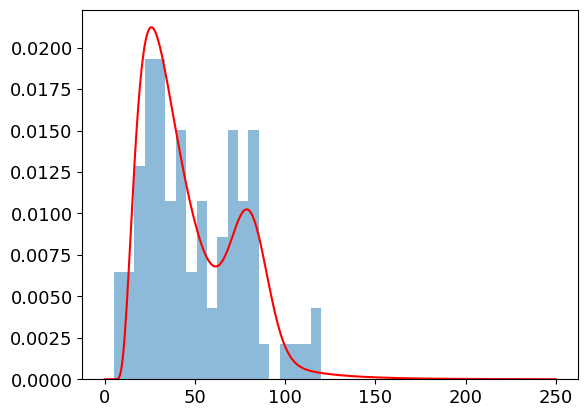

In [235]:
x_vals = np.linspace(0, 250, 500)
fitted_dist = (
    1 * (
        0.8 * lognorm.pdf(x_vals, s=0.60, loc=min(vels_data), scale=30) +
        0.2 * norm.pdf(x_vals, loc=80, scale=10)
    )
)

plt.hist(vels_data, bins=20, density=True, alpha=0.5, label='Original Data')
plt.plot(x_vals, fitted_dist, 'r-', label='Fitted Mixture')


In [238]:
import seaborn as sns
from scipy import interpolate

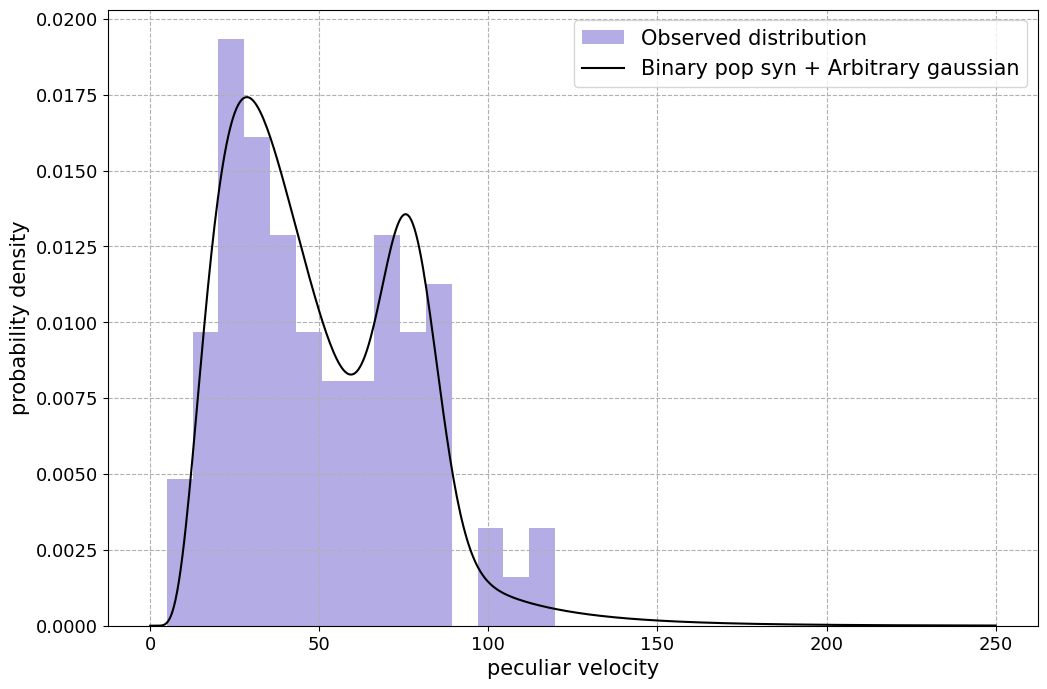

In [274]:
x_vals = np.linspace(0, 250, 500)
fitted_dist_1 = (
    1 * (
        0.5454 * lognorm.pdf(x_vals, s=0.5454, loc=0, scale=38.49) +
        0.0 * norm.pdf(x_vals, loc=80, scale=10) + (1-0.5454) * norm.pdf(x_vals, loc=50, scale=25)
    )
)

fitted_dist_2 = (
    1 * (
        0.79 * lognorm.pdf(x_vals, s=0.5454, loc=0, scale=38.49) +
        0.21* norm.pdf(x_vals, loc=76.59, scale=8.31)
    )
)



fitted_dist_3 = (
    1 * (
        0.5454 * lognorm.pdf(x_vals, s=0.5454, loc=0, scale=38.49) +
        0.3* norm.pdf(x_vals, loc=50, scale=25)
    )
)


plt.figure(figsize = [12,8])
plt.hist(vels_data, bins=15, density=True, alpha=0.5, label='Observed distribution', color = 'slateblue')
plt.plot(x_vals, fitted_dist_2, 'black', label='Binary pop syn + Arbitrary gaussian')
#plt.plot(x_vals, fitted_dist_3, 'black', label='Binary Pop Syn + Milky way dispersion')
plt.legend()
plt.grid(which='major', axis='both', linestyle = '--')
plt.ylabel('probability density')
plt.xlabel('peculiar velocity')
#plt.savefig('pop_syn_DES.png')

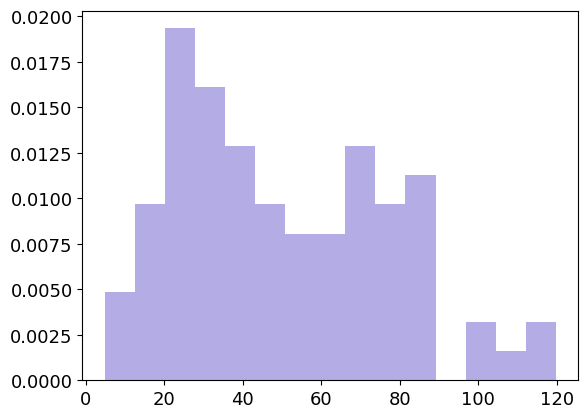

In [248]:
data = plt.hist(vels_data, bins=15, density=True, alpha=0.5, label='Original Data', color = 'slateblue')
ob = []
for i in range(0, len(data[1])-1):
  ob.append((data[1][i] + data[1][i+1])/2)
obs = np.array(ob)


x = np.linspace(0, 250, 500)
y = fitted_dist_2
f = interpolate.interp1d(x, y)
eval = f(obs)
residual = eval-data[0]

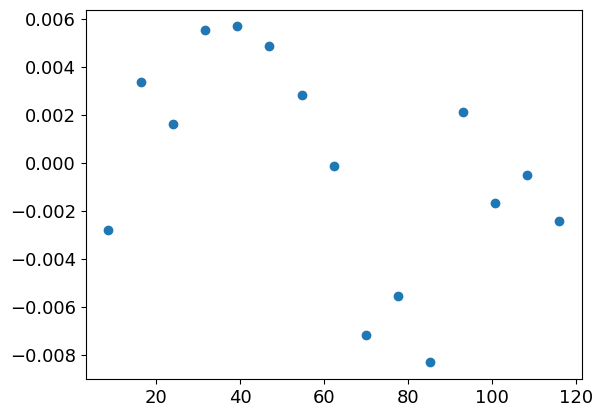

In [251]:
plt.scatter(obs, residual)

##interpolation to find the best fit

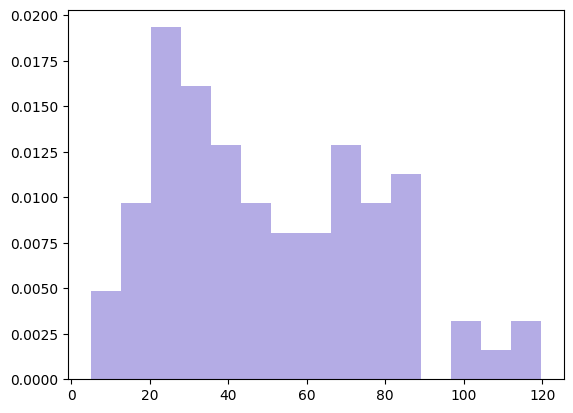

In [34]:
data = plt.hist(vels_data, bins=15, density=True, alpha=0.5, label='Original Data', color = 'slateblue')
ob = []
for i in range(0, len(data[1])-1):
  ob.append((data[1][i] + data[1][i+1])/2)
obs = np.array(ob)

In [36]:
from scipy import interpolate
x = np.linspace(0, 250, 500)
y = fitted_dist_2
f = interpolate.interp1d(x, y)
eval = f(obs[1])
chisq = np.sum((eval-obs[0])**2)


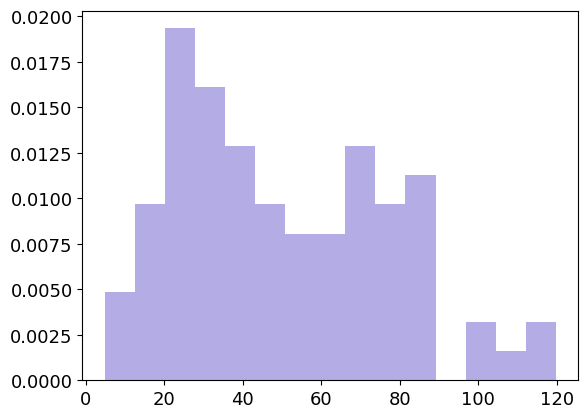

In [241]:
data = plt.hist(vels_data, bins=15, density=True, alpha=0.5, label='Original Data', color = 'slateblue')
ob = []
for i in range(0, len(data[1])-1):
  ob.append((data[1][i] + data[1][i+1])/2)
obs = np.array(ob)

## 2 dist grid

In [165]:
# grid

fraction_log = np.linspace(0.5, 1, 50)
gauss_mean = np.linspace(50, 100, 25)
gauss_sigma = np.linspace(6, 14, 25)
x_vals = np.linspace(0, 250, 500)

chisq, frac_list, mean_list, sigma_list = [], [], [], []
for frac in fraction_log:
  for mean in gauss_mean:
    for sigma in gauss_sigma:
      fitted_dist_2 = (1 * (frac * lognorm.pdf(x_vals, s=0.5454, loc=0, scale=38.49) + (1-frac)* norm.pdf(x_vals, loc=mean, scale=sigma)))
      f = interpolate.interp1d(x_vals, fitted_dist_2)
      eval = f(obs)
      chi_sq = np.sum((eval-data[0])**2)
      chisq.append(chi_sq)
      frac_list.append(frac)
      mean_list.append(mean)
      sigma_list.append(sigma)


(0.0, 0.00025)

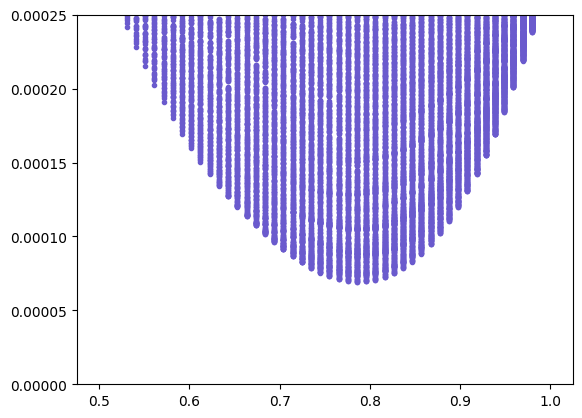

In [166]:
plt.scatter(frac_list, chisq, marker = '.', color = 'slateblue')
plt.ylim(0, 0.00025)


In [185]:
from scipy.stats import chi2
#
dof = 100 #Are we sure that there is 100 data points? There's indeed 50 data point and with 3 free parameters, our dof is now 47
alpha = dof/min(chisq)
first_sigma = chi2.isf(0.32, dof)
second_sigma = chi2.isf(0.05, dof)

In [186]:
reduced_chi = []
for i in range(len(chisq)):
    element = chisq[i]*alpha
    reduced_chi.append(element)

(75.0, 200.0)

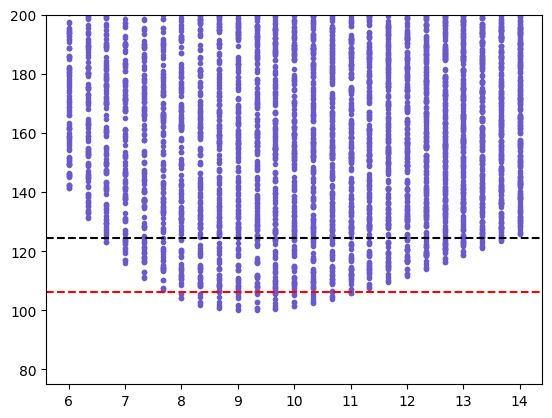

In [187]:
plt.scatter(sigma_list, reduced_chi, marker = '.', color = 'slateblue')
plt.axhline(first_sigma, linestyle = '--', color = 'r')
plt.axhline(second_sigma, linestyle = '--', color = 'black')
plt.ylim(75, 200)

In [188]:
grid_df = pd.DataFrame()

In [189]:
grid_df['chisq'] = np.array(reduced_chi)
grid_df['frac_list'] = np.array(frac_list)
grid_df['mean_list'] = np.array(mean_list)
grid_df['sigma_list'] = np.array(sigma_list)

In [190]:
for i in range(0, len(grid_df['chisq'])):
  if grid_df['chisq'][i] == min(grid_df['chisq']):
      best_frac = grid_df['frac_list'][i]
      best_mean = grid_df['mean_list'][i]
      best_sigma = grid_df['sigma_list'][i]

In [191]:
df_1 = grid_df[grid_df['chisq'] < first_sigma].reset_index()

In [192]:
max(df_1['frac_list'])

0.8163265306122449

In [193]:
print(best_frac, best_mean, best_sigma)


0.7857142857142857 77.08333333333334 9.333333333333332


### 3 dist grid

In [198]:
#fitted_dist_1 = (1 * (0.7 * lognorm.pdf(x_vals, s=0.5454, loc=0, scale=38.49) +0.2 * norm.pdf(x_vals, loc=80, scale=10) + 0.1 * norm.pdf(x_vals, loc=50, scale=30)))

fraction_log = np.linspace(0, 1, 100)
#gauss_mean = np.linspace(40, 100, 25)
#gauss_sigma = np.linspace(6, 14, 25)
x_vals = np.linspace(0, 250, 500)

chisq, frac_list, mean_list, sigma_list = [], [], [], []
for frac in fraction_log:
  #for mean in gauss_mean:
  # for sigma in gauss_sigma:
      fitted_dist_2 = (1 * (frac * lognorm.pdf(x_vals, s=0.5454, loc=0, scale=38.49) + (1-frac)* norm.pdf(x_vals, loc=50, scale=25)))
      f = interpolate.interp1d(x_vals, fitted_dist_2)
      eval = f(obs)
      chi_sq = np.sum((eval-data[0])**2)
      chisq.append(chi_sq)
      frac_list.append(frac)
      #mean_list.append(mean)
      #sigma_list.append(sigma)


In [199]:
from scipy.stats import chi2
#
dof = 100 #Are we sure that there is 100 data points? There's indeed 50 data point and with 3 free parameters, our dof is now 47
alpha = dof/min(chisq)
first_sigma = chi2.isf(0.32, dof)
second_sigma = chi2.isf(0.05, dof)
reduced_chi = []
for i in range(len(chisq)):
    element = chisq[i]*alpha
    reduced_chi.append(element)

(75.0, 200.0)

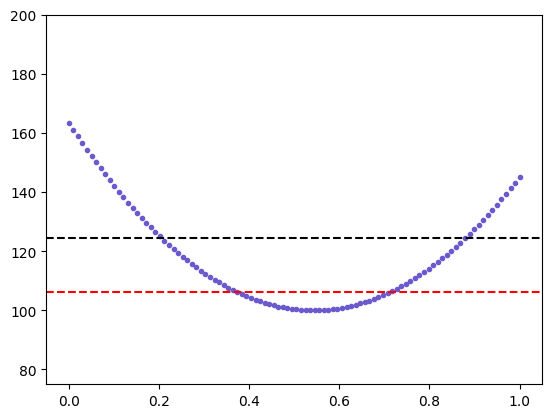

In [200]:
plt.scatter(frac_list, reduced_chi, marker = '.', color = 'slateblue')
plt.axhline(first_sigma, linestyle = '--', color = 'r')
plt.axhline(second_sigma, linestyle = '--', color = 'black')
plt.ylim(75, 200)

In [201]:
grid_df = pd.DataFrame()
grid_df['chisq'] = np.array(reduced_chi)
grid_df['frac_list'] = np.array(frac_list)


In [202]:
for i in range(0, len(grid_df['chisq'])):
  if grid_df['chisq'][i] == min(grid_df['chisq']):
      best_frac = grid_df['frac_list'][i]
      #best_mean = grid_df['mean_list'][i]
      #best_sigma = grid_df['sigma_list'][i]

In [203]:
print(best_frac, best_mean, best_sigma)

0.5454545454545455 77.08333333333334 9.333333333333332


## pop_syn

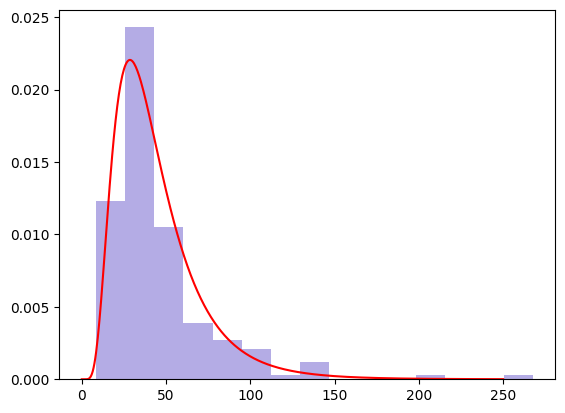

In [21]:
pop_vels = pd.read_csv('/content/pop_syn_vels')
pop_vels_data = pop_vels['vels']

x_vals = np.linspace(0, 250, 500)
fitted_dist = (
    1 * (
        1 * lognorm.pdf(x_vals, s=0.5454, loc=0, scale=38.49) +
        0.0 * norm.pdf(x_vals, loc=80, scale=10)
    )
)
plt.hist(pop_vels_data, bins=15, density=True, alpha=0.5, label='Original Data', color = 'slateblue')
plt.plot(x_vals, fitted_dist, 'r-', label='BES+DES_single')

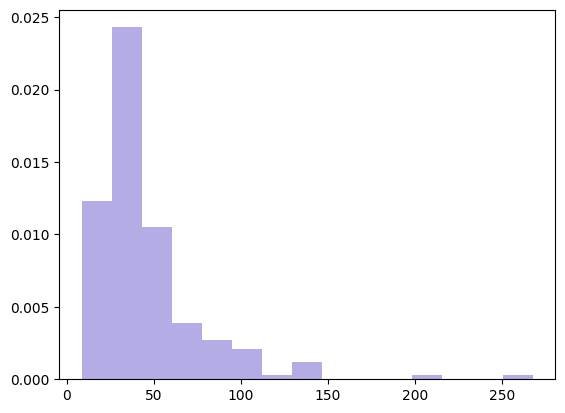

In [22]:
obs = plt.hist(pop_vels_data, bins=15, density=True, alpha=0.5, label='Original Data', color = 'slateblue')

bayesian

In [207]:
!pip install emcee
!pip install corner
import emcee
import corner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


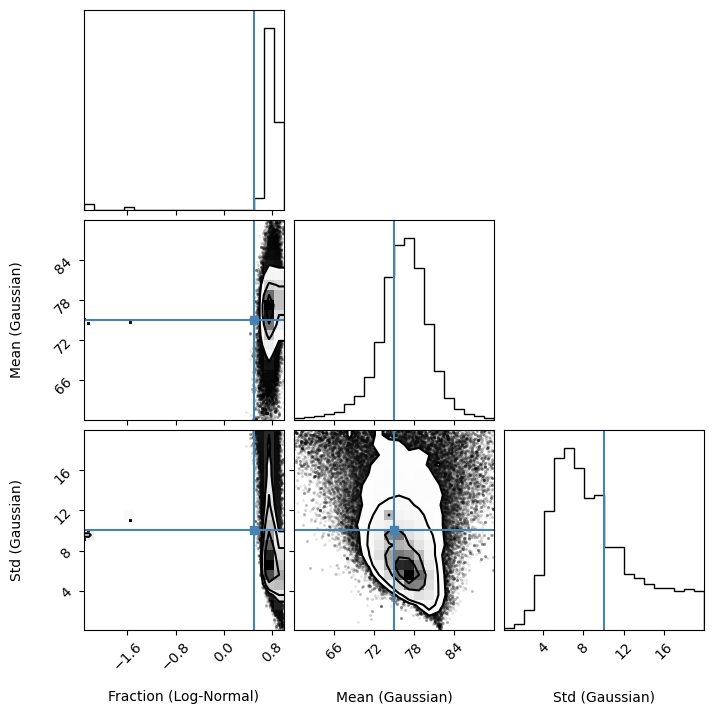

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

# Load the CSV data
df = pd.read_csv('/content/space_vels')
vels_data = abs(np.array(df['vels']))

# Define the log-likelihood function for the mixture model
def log_likelihood(params, x):
    frac_lognorm, mean_gaussian, std_gaussian = params

    lognorm_pdf = frac_lognorm * lognorm.pdf(x, s=0.54, loc=0, scale=38)
    gaussian_pdf = (1 - frac_lognorm) * norm.pdf(x, loc=mean_gaussian, scale=std_gaussian)

    return np.sum(np.log(lognorm_pdf + gaussian_pdf))

# Define the log-prior for the parameters
def log_prior(params):
    frac_lognorm, mean_gaussian, std_gaussian = params

    # Assuming a flat prior for the fraction
    if 0 <= frac_lognorm <= 1 and 60 <= mean_gaussian <= 90 and 0 <= std_gaussian <= 20:
        return 0.0
    return -np.inf

# Define the log-posterior function
def log_posterior(params, x):
    prior = log_prior(params)
    if np.isinf(prior):
        return prior
    likelihood = log_likelihood(params, x)
    return prior + likelihood

# Initial parameter values for the sampler
initial_params = [0.5, 75, 10]

# Set up the sampler
ndim = len(initial_params)
nwalkers = 100
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(vels_data,))

# Burn-in phase
burnin_steps = 1000
pos, _, _ = sampler.run_mcmc(np.random.randn(nwalkers, ndim) + initial_params, burnin_steps)
sampler.reset()

# Main sampling phase
sampling_steps = 3000
sampler.run_mcmc(pos, sampling_steps)

# Extract samples from the sampler
samples = sampler.get_chain(discard=burnin_steps, flat=True)

# Plot the corner plot
labels = ["Fraction (Log-Normal)", "Mean (Gaussian)", "Std (Gaussian)"]
fig = corner.corner(samples, labels=labels, truths=initial_params)

plt.show()

In [223]:
plt.rc('font',   size=15)          # controls default text sizes
plt.rc('axes',   titlesize=15)     # fontsize of the axes title
plt.rc('axes',   labelsize=15)     # fontsize of the x and y labels
plt.rc('xtick',  labelsize=13)     # fontsize of the tick labels
plt.rc('ytick',  labelsize=13)     # fontsize of the tick labels
plt.rc('legend', fontsize=15)      # legend fontsize
plt.rc('figure', titlesize=15)

<Figure size 2400x1600 with 0 Axes>

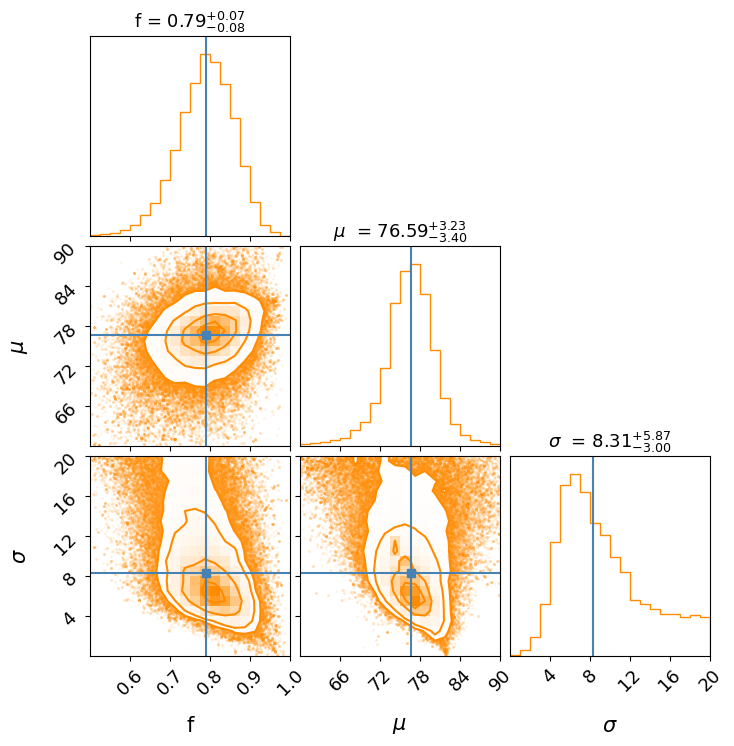

In [228]:
plt.figure(figsize = [12,8], dpi = 200)
labels = ["f", "$\mu$ ", "$\sigma$ "]
fig = corner.corner(samples, labels=labels, range = [[0.5,1], [60, 90], [0,20]],  color = 'darkorange', truths=[0.79, 76.59, 8.31], title_kwargs={"fontsize": 13}, show_titles=True, group = 'posterior')

plt.savefig('final_monte_carlo.png')